In [1]:
#Clean and Analyze two employee suveys
# Why are employees resigning - short and long tenured?
#How does age impact the reasons for resignation?

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=100

In [3]:
dete_survey=pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey=pd.read_csv('tafe_survey.csv')

dete_survey.head(1)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes


In [4]:
tafe_survey.head(1)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [5]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
print('dete:',dete_survey.shape)
print('tafe:',tafe_survey.shape)

dete: (822, 56)
tafe: (702, 72)


In [8]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [9]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

In [10]:
#Both surveys have null values
#dete shape: (822, 56); tafe shape: (702, 72)

In [11]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [12]:
# Cleaned datasets:  (1) Dropped irrelevant columns & converted
# the 'Not Stated' values to NaNs

In [13]:
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fact

In [14]:
dete_survey_updated.columns=dete_survey_updated.columns\
.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [15]:
new_names = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',\
             'Reason for ceasing employment': 'separationtype',\
             'Gender. What is your Gender?': 'gender',\
             'CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status',\
             'Classification. Classification': 'position',\
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',\
             'lengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

#rename columns to dictionary above
tafe_survey_updated=tafe_survey_updated.rename(new_names, axis=1)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')

In [16]:
#renamed tafe_survey_updated columns to align to the
#dete_survey_updated columns

In [17]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [18]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [19]:
tafe_resignations=tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()
len(tafe_resignations)

340

In [20]:
dete_resignations=dete_survey_updated[
(dete_survey_updated['separationtype']=='Resignation-Other reasons') |\
(dete_survey_updated['separationtype']=='Resignation-Other employer') |\
(dete_survey_updated['separationtype']=='Resignation-Move overseas/interstate')]\
.copy()
len(dete_resignations)    

311

In [21]:
#Filtered dfs for 'separationtype' contains resignation only
#This provides an apples-to-apples df comparison.

In [22]:
dete_resignations.cease_date.value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [23]:
pattern = r'(?P<digits>[0-2][0-2][0-9][0-9])'
dete_yr=dete_resignations['cease_date'].str.\
extract(pattern, expand=False)  #expand False returns series
dete_yr=dete_yr.astype('float')
dete_resignations['cease_date']=dete_yr
dete_resignations['cease_date'].value_counts(ascending=True)

2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64

In [24]:
tafe_resignations.cease_date.value_counts(ascending=True)

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

In [25]:
dete_resignations.dete_start_date.value_counts(ascending=True)

1963.0     1
1977.0     1
1973.0     1
1975.0     1
1987.0     1
1982.0     1
1984.0     1
1972.0     1
1971.0     1
1974.0     2
1976.0     2
1983.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1990.0     5
1993.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [26]:
#dete resignations are 2006-2013 with starts 1963-2011
#tafe resignations are 2009-2013

In [27]:
dete_resignations['institute_service']=dete_resignations['cease_date']-\
dete_resignations['dete_start_date']

In [28]:
#Calculated service years in dete.  Goal is to analyze resignations
#by short and long service tenures.

In [29]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [30]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [31]:
#scrub values so they are True, False, or NaN
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val=='-':
        return False
    else:
        return True
#Apply mapping form update_vals function above
#Then use any for TF.  axis=1 applies any logic to rows.
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]\
.applymap(update_vals).any(axis=1, skipna=False)

In [32]:
#all the dete_resignations columns below are either True or False
cols=['job_dissatisfaction','dissatisfaction_with_the_department',\
      'physical_work_environment','lack_of_recognition',\
      'lack_of_job_security', 'work_location','employment_conditions',\
      'work_life_balance','workload']

dete_resignations['dissatisfied']=dete_resignations[cols]\
.any(axis=1, skipna=False)

In [33]:
tafe_resignations_up=tafe_resignations.copy()
dete_resignations_up=dete_resignations.copy()

In [34]:
#verify results
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [35]:
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [36]:
#Applied logic to tag whether 'dissatisfied' was the 
#resignation reason - True or False?  
#How:  Scrubbed data with a scrubbing function and applymap.
#Then, used '.any' to return True if 'dissatisfied' was a reason
#in at least one 'dissatisifed' column.

In [37]:
dete_resignations_up.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,False


In [38]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [39]:
combined=pd.concat([dete_resignations_up, tafe_resignations_up])

In [40]:
#drop columns less than ~80% populated
combined_updated=combined.dropna(thresh=500, axis=1).copy()

In [41]:
#convert column type to string.
#match decimal digit and one+ repetitions of regex.
patt=r'(\d+)'

combined_updated['institute_service_up']=combined_updated['institute_service']\
.astype('str').str.extract(patt,expand=False)
print('extracted digits:',combined_updated['institute_service_up'].unique())

extracted digits: ['7' '18' '3' '15' '14' '5' nan '30' '32' '39' '17' '9' '6' '1' '35' '38'
 '36' '19' '4' '26' '10' '8' '2' '0' '23' '13' '16' '12' '21' '20' '24'
 '33' '22' '28' '49' '11' '41' '27' '42' '25' '29' '34' '31']


In [42]:
combined_updated['institute_service_up'] = \
combined_updated['institute_service_up'].astype('float')

In [43]:
#map institute_service_up to career stage
def map_val(v):
    if pd.isnull(v):  #check for NaNs
        return np.nan
    elif 3 <= v <= 6:
        return "Experienced"
    elif 7 <= v <= 10:
        return "Established"
    elif v >= 11:
        return "Veteran"
    else:
        return "New"
    
combined_updated['service_cat']=combined_updated['institute_service_up'].apply(map_val)

In [44]:
print("The new service_cat column.  Bucketing by yrs of service:")
combined_updated['service_cat'].value_counts(dropna=False)

The new service_cat column.  Bucketing by yrs of service:


New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [45]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [46]:
combined_updated['dissatisfied']=combined_updated['dissatisfied']\
.fillna(False)

In [51]:
piv=combined_updated.pivot_table(index='service_cat',values='dissatisfied')
piv

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


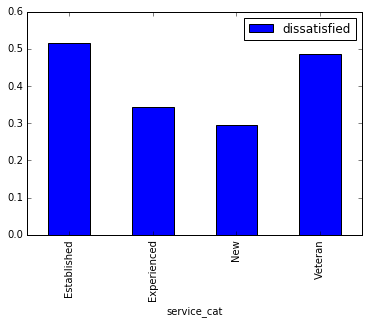

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
piv.plot(kind='bar')
plt.show()

In [54]:
#Plot observations:
#Dissatisfaction increases with tenure, then drops with
#the veteran 11+ years.